# flumine backtest analysis notebook

Simple notebook that injests the json format from the JsonLoggingControl example to allow analysis of results.

First step is to import required libraries and create three dataframes 

```python
df_strategies
df_markets
df_orders
```

In [41]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

filename = "/tmp/orders.json"

with open(filename, "r") as f:
    data = json.load(f)
    df_strategies = pd.DataFrame(data["strategies"])
    df_markets = pd.DataFrame(data["markets"])
    df_orders = pd.DataFrame(data["orders"])

Join data into single dataframe `df`

In [42]:
df = pd.merge(df_orders, df_markets, left_on="market_id", right_on="market_id", how="left")
df = pd.merge(df, df_strategies, left_on="trade__strategy", right_on="name", how="left")

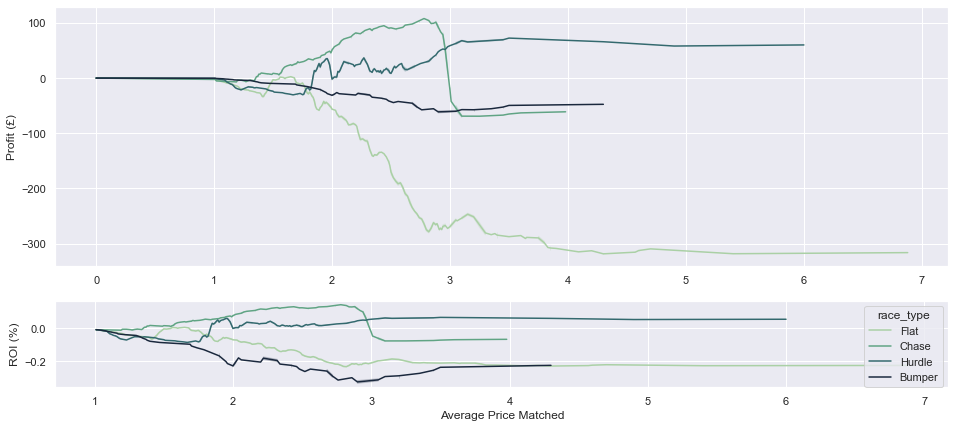

In [56]:
group_by = "race_type"
x_axis = "info__average_price_matched"
xlim = None
ylim = None
palette = "ch:r=-.5,l=.75"

df = df.sort_values(x_axis)
df['cum_profit'] = df.simulated__profit.groupby(df[group_by]).cumsum()
df['cum_roi'] = df.simulated__profit.groupby(df[group_by]).cumsum() / df.info__size_matched.groupby(df[group_by]).cumsum()

f, ax = plt.subplots(figsize=(16, 7), nrows=2, gridspec_kw={'height_ratios':[3, 1]})

# Profit
sns.lineplot(
    ax=ax[0], x=x_axis, y="cum_profit", hue=group_by, data=df, palette=palette, legend=False
)
ax[0].set(xlabel=None, ylabel="Profit (£)")

# ROI
sns.lineplot(
    ax=ax[1], x=x_axis, y="cum_roi", hue=group_by, data=df, palette=palette
)
ax[1].set(xlabel="Average Price Matched", ylabel="ROI (%)")
plt.show()